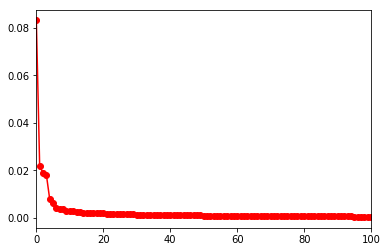

In [7]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
df = pd.read_table("rr.txt",sep=" ",header=None)
df = df.drop(947, 1)
cov=np.array(df)


def findMaxEigen(cov,eps=0.01):
    LL=cov.shape[0]
    vector=np.random.rand(LL)
   # vector=np.array(range(LL))
    vector=vector.reshape(LL,1)
    vector=vector/norm(vector)
    count=0
    while(True):
        tempv=np.matmul(cov,vector)
        tempv=tempv/norm(tempv)
        #print tempv[:10]
        if norm(tempv-vector)<eps:
            vector=tempv
            break
        else:
            vector=tempv
        count+=1
    tempv=np.matmul(cov,vector)
    eigenvalue=norm(tempv)/norm(vector)
    return eigenvalue,vector


mcov=cov
evalue=[]
evector=[]
count=0

for i in range(500):
    value,vector=findMaxEigen(mcov)
    count+=1
    #print count
    evalue.append(value)
    evector.append(vector)
    mcov=mcov-value*np.matmul(vector,vector.transpose())

import pylab as pl
pl.plot(range(500),evalue,"ro-")
pl.xlim(0,100)
pl.show()